# Softmax activation unit


In both softmax regression and neural networks with Softmax outputs, N outputs are generated and one output is selected as the predicted category. In both cases a vector is generated by a linear function which is applied to a softmax function. The softmax function converts into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will add to 1, so that they can be interpreted as probabilities. The larger inputs will correspond to larger output probabilities.


The output $\mathbf{a}$ is a vector of length N, so for softmax regression, you could also write:

\begin{align}
\mathbf{a}(x) =
\begin{bmatrix}
P(y = 1 | \mathbf{x}; \mathbf{w},b) \\
\vdots \\
P(y = N | \mathbf{x}; \mathbf{w},b)
\end{bmatrix}
=
\frac{1}{ \sum_{k=1}^{N}{e^{z_k} }}
\begin{bmatrix}
e^{z_1} \\
\vdots \\
e^{z_{N}} \\
\end{bmatrix} \tag{2}
\end{align}

Which shows the output is a vector of probabilities. The first entry is the probability the input is the first category given the input $\mathbf{x}$ and parameters $\mathbf{w}$ and $\mathbf{b}$.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../deeplearning.mplstyle')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget

from matplotlib.widgets import Slider

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
# from lab_utils_common import dlc
# from lab_utils_softmax import plt_softmax

dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0', dldarkblue =  '#0D5BDC')


def plt_softmax(my_softmax):
    fig, ax = plt.subplots(1,2,figsize=(8,4))
    plt.subplots_adjust(bottom=0.35)

    axz0 = fig.add_axes([0.15, 0.10, 0.30, 0.03]) # [left, bottom, width, height]
    axz1 = fig.add_axes([0.15, 0.15, 0.30, 0.03])
    axz2 = fig.add_axes([0.15, 0.20, 0.30, 0.03])
    axz3 = fig.add_axes([0.15, 0.25, 0.30, 0.03])

    z3 = Slider(axz3, 'z3', 0.1, 10.0, valinit=4, valstep=0.1)
    z2 = Slider(axz2, 'z2', 0.1, 10.0, valinit=3, valstep=0.1)
    z1 = Slider(axz1, 'z1', 0.1, 10.0, valinit=2, valstep=0.1)
    z0 = Slider(axz0, 'z0', 0.1, 10.0, valinit=1, valstep=0.1)

    z = np.array(['z0','z1','z2','z3'])
    bar = ax[0].barh(z, height=0.6, width=[z0.val,z1.val,z2.val,z3.val], left=None, align='center')
    bars = bar.get_children()
    ax[0].set_xlim([0,10])
    ax[0].set_title("z input to softmax")

    a = my_softmax(np.array([z0.val,z1.val,z2.val,z3.val]))
    anames = np.array(['a0','a1','a2','a3'])
    sbar = ax[1].barh(anames, height=0.6, width=a, left=None, align='center',color=dlc["dldarkred"])
    sbars = sbar.get_children()
    ax[1].set_xlim([0,1])
    ax[1].set_title("softmax(z)")

    def update(val):
        bars[0].set_width(z0.val)
        bars[1].set_width(z1.val)
        bars[2].set_width(z2.val)
        bars[3].set_width(z3.val)
        a = my_softmax(np.array([z0.val,z1.val,z2.val,z3.val]))
        sbars[0].set_width(a[0])
        sbars[1].set_width(a[1])
        sbars[2].set_width(a[2])
        sbars[3].set_width(a[3])

        fig.canvas.draw_idle()

    z0.on_changed(update)
    z1.on_changed(update)
    z2.on_changed(update)
    z3.on_changed(update)

    plt.show()


In [3]:
# define the softmax function

def softmax(z):
  ez = np.exp(z)
  sm = ez/np/sum(ez)
  return sm

TypeError: unsupported operand type(s) for /: 'float' and 'module'

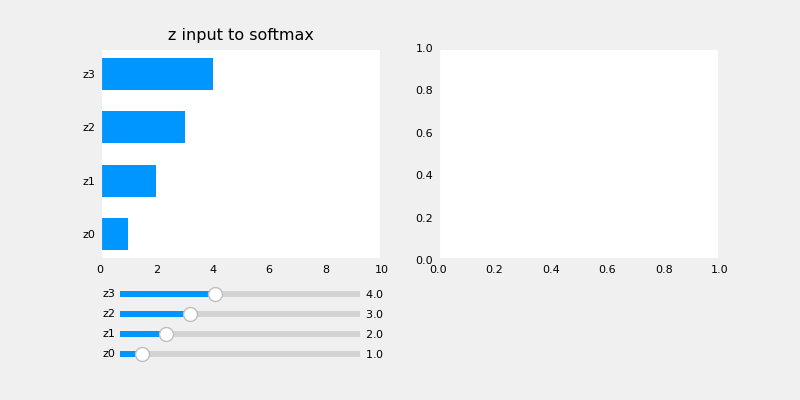

In [5]:
plt.close("all")
plt_softmax(softmax)